In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# 1. Definição do Problema

O objetivo deste projeto é desenvolver um modelo preditivo para estimar o nível de **maturação das maçãs** com base em características físicas e sensoriais.

Além disso, buscamos compreender **quais variáveis influenciam no nível de maturação**, com um foco especial na relação entre **acidez** e **suculência**.

A previsão precisa do grau de maturação das maçãs pode ser fundamental para otimizar processos agrícolas, definir o momento ideal de colheita e garantir maior qualidade dos frutos comercializados.

A tabela abaixo apresenta as variáveis disponíveis na base de dados e seus respectivos significados:

| **Nome da Variável** | **Descrição** |
|----------------------|--------------|
| `id_maca`           | Identificador único da maçã na base de dados. |
| `tamanho`           | Tamanho da maçã em uma escala numérica. |
| `peso`              | Peso da maçã em uma escala numérica. |
| `doçura`            | Nível de doçura da maçã, mensurado em uma escala contínua. |
| `crocancia`         | Nível de crocância da maçã, mensurado em uma escala contínua. |
| `suculencia`        | Grau de suculência da maçã, mensurado em uma escala contínua. |
| `maturacao`         | Nível de maturação da maçã, sendo a variável-alvo a ser prevista. |
| `acidez`            | Nível de acidez da maçã, mensurado em uma escala contínua. |
| `qualidade`         | Classificação categórica da maçã, indicando se é considerada "boa" ou "ruim". |

Essas variáveis serão analisadas para identificar padrões e correlações que possam auxiliar na construção de um modelo preditivo capaz de estimar com precisão o nível de **maturação das maçãs**.

# 2. Coleta e Pré-processamento dos Dados

In [2]:
# Carregar a base de dados
dados = "apple_data.csv"
df = pd.read_csv(dados)

# Exibir as primeiras linhas do dataset
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [3]:
df.rename(columns={
    "A_id": "id_maca",
    "Size": "tamanho",
    "Weight": "peso",
    "Sweetness": "doçura",
    "Crunchiness": "crocancia",
    "Juiciness": "suculencia",
    "Ripeness": "maturidade",
    "Acidity": "acidez",
    "Quality": "qualidade"
}, inplace=True)
df.head()

,id_maca,tamanho,peso,doçura,crocancia,suculencia,maturidade,acidez,qualidade
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


## 2.1 Verificação de Valores Nulos
Antes de realizar qualquer transformação nos dados, verificamos a existência de valores nulos nas colunas da base de dados. A presença de valores ausentes pode comprometer a análise e o desempenho do modelo preditivo.

In [4]:
# Verificar valores nulos na base de dados
valores_nulos = df.isnull().sum()
valores_nulos

id_maca       1
tamanho       1
peso          1
doçura        1
crocancia     1
suculencia    1
maturidade    1
acidez        0
qualidade     1
dtype: int64

In [5]:
# Identificar colunas numéricas
colunas_numericas = df.select_dtypes(include=['number']).columns
colunas_numericas

Index(['id_maca', 'tamanho', 'peso', 'doçura', 'crocancia', 'suculencia',
       'maturidade'],
      dtype='object')

## 2.2 Preenchimento de Valores Faltantes
Para garantir a integridade dos dados e evitar perda de informações, os valores ausentes **nas colunas numéricas** foram preenchidos com a **média** dos valores disponíveis em cada respectiva coluna. Esse método é adequado para manter a distribuição original dos dados sem introduzir viés significativo.

In [6]:
# Preencher valores nulos apenas nas colunas numéricas com a média
df[colunas_numericas] = df[colunas_numericas].apply(lambda x: x.fillna(x.mean()))
df.head()

,id_maca,tamanho,peso,doçura,crocancia,suculencia,maturidade,acidez,qualidade
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [7]:
# Exibir a quantidade de valores nulos por coluna após o preenchimento
valores_nulos_pos_tratamento = df.isnull().sum()
valores_nulos_pos_tratamento

id_maca       0
tamanho       0
peso          0
doçura        0
crocancia     0
suculencia    0
maturidade    0
acidez        0
qualidade     1
dtype: int64

In [8]:
# Remover linhas onde a coluna 'qualidade' contém valores NaN
df = df.dropna(subset=['qualidade'])

# Verificar se ainda há valores NaN na coluna 'qualidade'
valores_nulos_qualidade = df['qualidade'].isnull().sum()

# Exibir a quantidade de valores nulos restantes na coluna 'qualidade'
valores_nulos_qualidade

0

In [9]:
df

,id_maca,tamanho,peso,doçura,crocancia,suculencia,maturidade,acidez,qualidade
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3995,3995.0,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,bad
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good


# 2.3 Ajuste do Tipo de Dados

Conversão da Coluna 'Acidez' para Numérico:
- A coluna **acidez** foi convertida para um formato numérico para garantir que todas as análises quantitativas e modelagens futuras sejam realizadas corretamente.

Verificação de Valores Não Numéricos:
- Após a conversão, verificamos a presença de valores não numéricos. Nenhum valor não numérico foi identificado, garantindo que os dados estão prontos para as próximas etapas de análise.


In [10]:
# Converter a coluna 'acidez' para numérico, forçando a conversão e tratando erros
df['acidez'] = pd.to_numeric(df['acidez'], errors='coerce')

# Verificar se ainda há valores não numéricos na coluna 'acidez'
valores_nulos_acidez = df['acidez'].isnull().sum()

# Exibir se há valores não numéricos na coluna 'acidez' após a conversão
valores_nulos_acidez

0

# 2.4 Transformação da Variável Alvo

A variável **maturidade** estava originalmente em formato contínuo, mas para facilitar a interpretação e o uso no modelo preditivo, foi convertida em categorias:

- **Verde**: Baixo nível de maturação.
- **Madura**: Nível intermediário de maturação.
- **Muito Madura**: Alto nível de maturação.

A categorização foi realizada com base na distribuição estatística da variável **maturidade**, considerando a média e o desvio padrão para definir os intervalos.

In [11]:
# Verificar estatísticas da variável de maturidade para definir os intervalos de categorização
maturidade_min = df['maturidade'].min()
maturidade_max = df['maturidade'].max()
maturidade_media = df['maturidade'].mean()
maturidade_desvio = df['maturidade'].std()

In [12]:
# Definir os intervalos para categorização
df['maturidade_categoria'] = pd.cut(
    df['maturidade'], 
    bins=[maturidade_min, maturidade_media - maturidade_desvio, maturidade_media + maturidade_desvio, maturidade_max],
    labels=['Verde', 'Madura', 'Muito Madura']
)
df

,id_maca,tamanho,peso,doçura,crocancia,suculencia,maturidade,acidez,qualidade,maturidade_categoria
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good,Madura
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good,Madura
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad,Madura
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good,Verde
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good,Madura
...,...,...,...,...,...,...,...,...,...,...
3995,3995.0,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,bad,Madura
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,good,Madura
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,bad,Muito Madura
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,good,Madura


# 3. Análise Exploratória de Dados (EDA)

## 3.1 Estatísticas Básicas

Nesta etapa, analisamos as estatísticas descritivas das variáveis numéricas para entender melhor a distribuição dos dados.

Esses valores ajudam a identificar a variabilidade e possíveis anomalias nos dados.

In [13]:
# Estatísticas básicas das variáveis numéricas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id_maca,4000.0,1999.500000,1154.844867,0.000000,999.750000,1999.500000,2999.250000,3999.000000
tamanho,4000.0,-0.503015,1.928059,-7.151703,-1.816765,-0.513703,0.805526,6.406367
peso,4000.0,-0.989547,1.602507,-7.149848,-2.011770,-0.984736,0.030976,5.790714
doçura,4000.0,-0.470479,1.943441,-6.894485,-1.738425,-0.504758,0.801922,6.374916
crocancia,4000.0,0.985478,1.402757,-6.055058,0.062764,0.998249,1.894234,7.619852
suculencia,4000.0,0.512118,1.930286,-5.961897,-0.801286,0.534219,1.835976,7.364403
maturidade,4000.0,0.498277,1.874427,-5.864599,-0.771677,0.503445,1.766212,7.237837
acidez,4000.0,0.076877,2.110270,-7.010538,-1.377424,0.022609,1.510493,7.404736


### 📌 **Principais Observações**:
- A média de **tamanho**, **peso** e **doçura** está negativa, o que pode indicar um deslocamento na escala utilizada.
- O desvio padrão relativamente alto em algumas variáveis sugere uma variação considerável nos dados.
- Algumas variáveis apresentam valores extremos (mínimos e máximos), o que pode indicar a presença de outliers.

Essas estatísticas serão úteis para as próximas análises, como a **distribuição das variáveis** e a **identificação de outliers**.

# 3.2 Análise de Correlação

A matriz de correlação nos permite identificar a relação entre as variáveis numéricas do conjunto de dados. O coeficiente de correlação varia de **-1 a 1**, onde:

- **1** indica uma correlação positiva forte.
- **-1** indica uma correlação negativa forte.
- **0** indica ausência de correlação.

A figura acima apresenta a matriz de correlação entre as variáveis numéricas do nosso conjunto de dados.

In [14]:
# Selecionar apenas as colunas numéricas para calcular a correlação
df_numerico = df.select_dtypes(include=['number'])

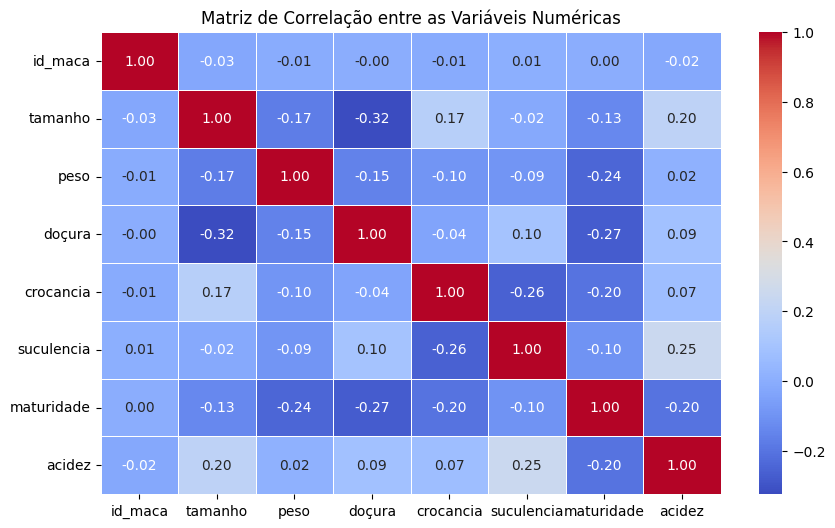

In [15]:
# Calcular a matriz de correlação
matriz_correlacao_corrigida = df_numerico.corr()

# Criar um heatmap para visualizar a correlação entre as variáveis numéricas
plt.figure(figsize=(10, 6))
sns.heatmap(matriz_correlacao_corrigida, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação entre as Variáveis Numéricas")
plt.show()

### 📌 **Principais Observações**:
- A variável **maturidade** apresenta correlação negativa com:
  - **doçura (-0.27)**
  - **peso (-0.24)**
  - **crocância (-0.20)**  
  Isso pode indicar que maçãs menos maduras tendem a ser mais doces e crocantes.
  
- A variável **acidez** apresenta uma correlação positiva com **suculência (0.25)**, o que pode indicar que maçãs mais ácidas também são mais suculentas.

- O **tamanho** tem correlação moderada com **acidez (0.20)**, sugerindo que maçãs maiores podem ser um pouco mais ácidas.

Esses insights são importantes para entender melhor a influência das variáveis na maturação das maçãs e serão úteis para a construção do modelo preditivo.

# 3.3 Distribuição das Variáveis

Para compreender melhor os dados, analisamos a distribuição das variáveis numéricas utilizando histogramas. A curva de densidade também foi adicionada para melhor visualização da tendência dos valores.

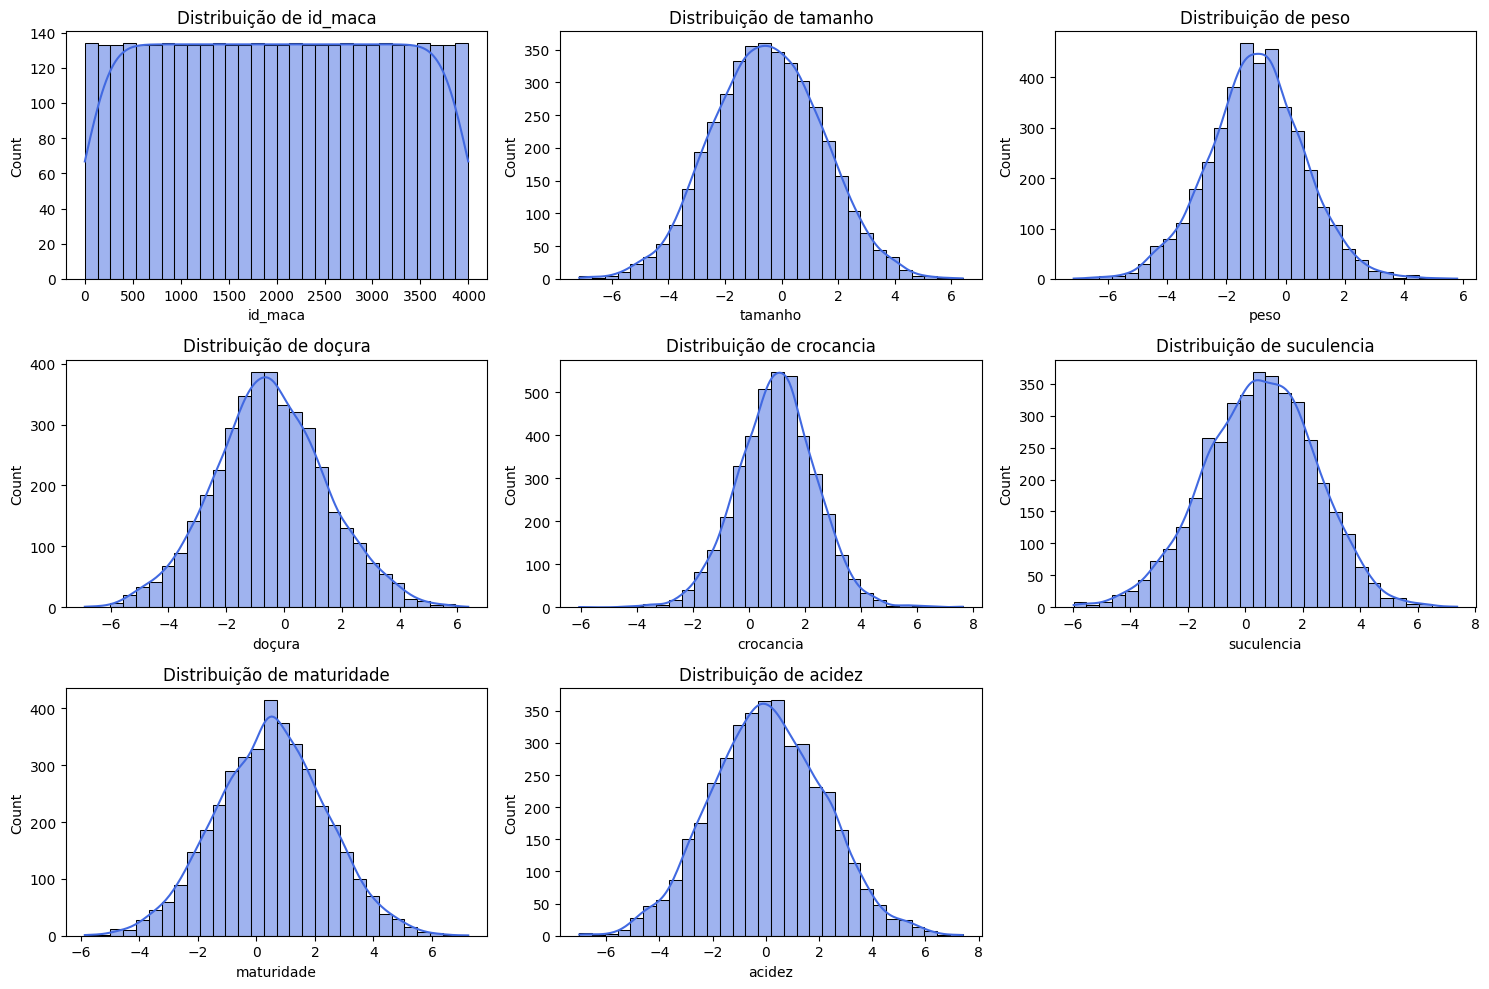

In [16]:
# Criar histogramas para visualizar a distribuição das variáveis numéricas
num_cols = df_numerico.columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], bins=30, kde=True, color='royalblue')
    plt.title(f'Distribuição de {col}')

plt.tight_layout()
plt.show()

### 📌 **Principais Observações**:
- As variáveis **tamanho, peso, doçura, crocância, suculência, maturidade e acidez** apresentam distribuições próximas de uma **distribuição normal**, com leve assimetria em algumas delas.
- A variável **maturidade**, que é nossa variável-alvo, apresenta uma distribuição relativamente simétrica, o que pode indicar um bom comportamento para modelagem preditiva.
- A variável **id_amostra** apresenta uma distribuição uniforme, o que era esperado, pois se trata de um identificador e não deve ser usado na modelagem.

# 3.4 Boxplots para Entender Outliers

Os **boxplots** são gráficos úteis para identificar valores discrepantes (outliers) em nossas variáveis numéricas. A análise de outliers é fundamental, pois esses valores podem impactar o desempenho do modelo preditivo.

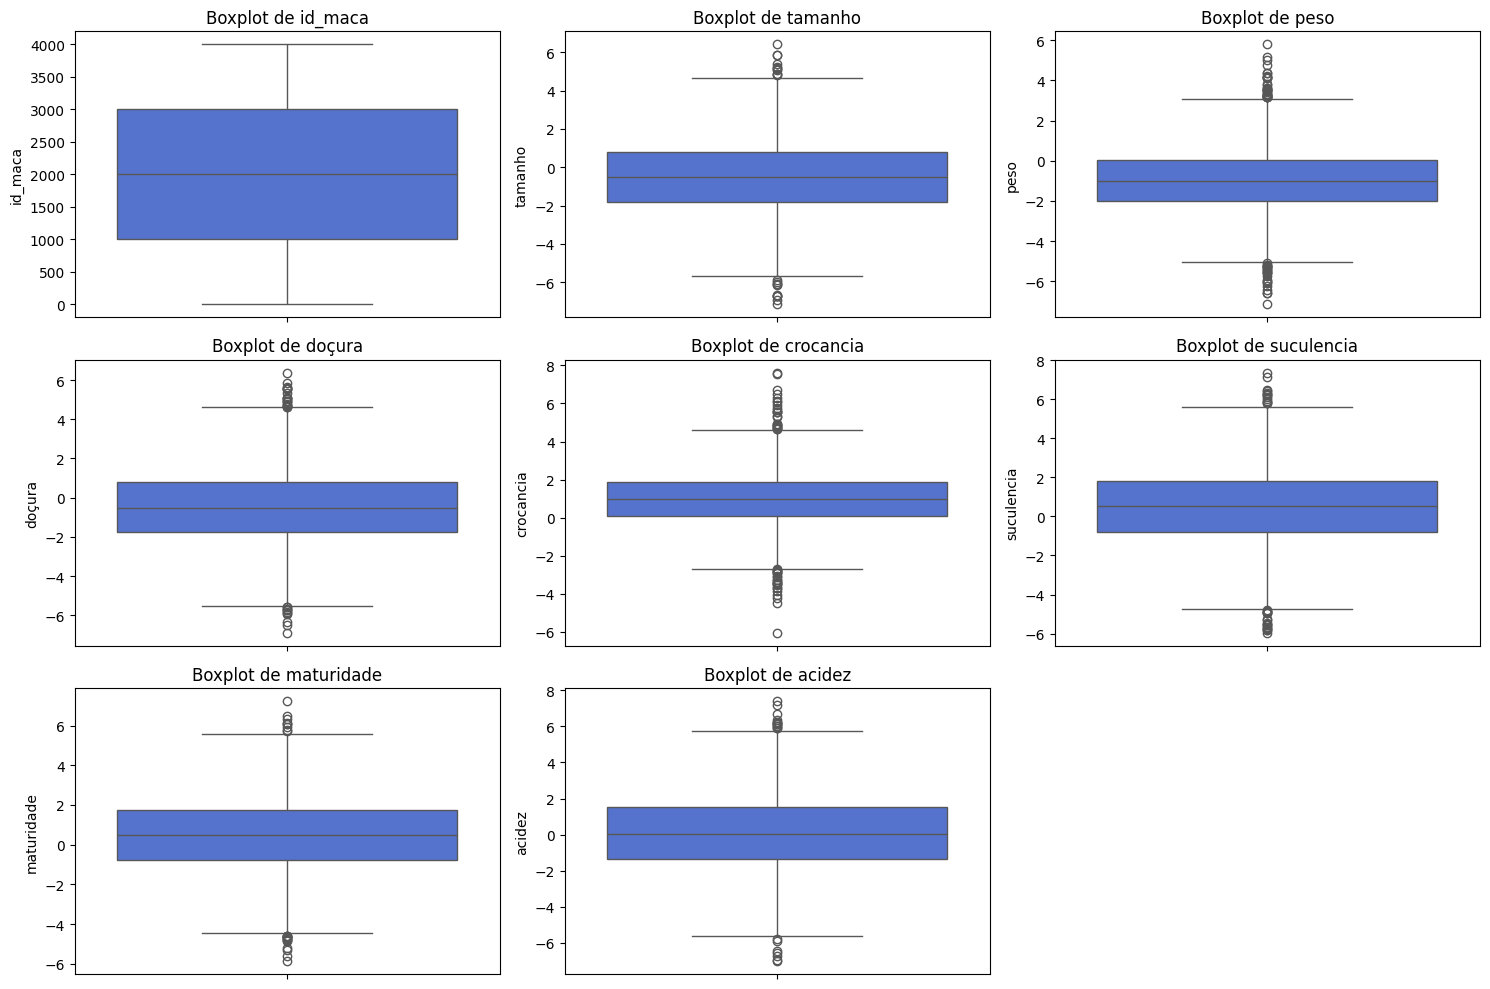

In [17]:
# Criar boxplots para visualizar outliers nas variáveis numéricas
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col], color='royalblue')
    plt.title(f'Boxplot de {col}')

plt.tight_layout()
plt.show()

### 📌 **Principais Observações**:
- As variáveis **tamanho, peso, doçura, crocância, suculência, maturidade e acidez** apresentam outliers em ambos os extremos da distribuição.
- A variável **maturidade**, nossa variável-alvo, contém alguns valores extremos que podem impactar a modelagem. Será necessário avaliar se esses outliers são erros ou se fazem parte da distribuição natural dos dados.
- A variável **id_amostra** não tem significado estatístico relevante e será desconsiderada na análise de outliers.

# 3.5 Tratamento de Outliers

Os outliers foram tratados utilizando o **método do Intervalo Interquartil (IQR)**. Esse método define limites para cada variável e remove valores que estão muito distantes da distribuição normal.

In [18]:
# Definir um método para remoção de outliers usando o IQR (Intervalo Interquartil)
def remover_outliers(df, colunas):
    for col in colunas:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        df = df[(df[col] >= limite_inferior) & (df[col] <= limite_superior)]
    return df

In [19]:
# Aplicar a remoção de outliers nas variáveis numéricas, exceto 'id_amostra'
colunas_para_tratar = [col for col in num_cols if col != 'id_amostra']
df_sem_outliers = remover_outliers(df, colunas_para_tratar)
df_sem_outliers

,id_maca,tamanho,peso,doçura,crocancia,suculencia,maturidade,acidez,qualidade,maturidade_categoria
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good,Madura
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad,Madura
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good,Verde
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good,Madura
5,5.0,-3.425400,-1.409082,-1.913511,-0.555775,-3.853071,1.914616,-2.981523,bad,Madura
...,...,...,...,...,...,...,...,...,...,...
3995,3995.0,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,bad,Madura
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,good,Madura
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,bad,Muito Madura
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,good,Madura


In [20]:
# Exibir a diferença de tamanho da base antes e depois da remoção de outliers
quantidade_antes = df.shape[0]
quantidade_depois = df_sem_outliers.shape[0]

diferenca = {
    "Tamanho Antes": quantidade_antes,
    "Tamanho Depois": quantidade_depois,
    "Registros Removidos": quantidade_antes - quantidade_depois
}

In [21]:
diferenca

{'Tamanho Antes': 4000, 'Tamanho Depois': 3786, 'Registros Removidos': 214}

### 📌 **Principais Ajustes**:
- O IQR foi calculado para todas as variáveis numéricas (exceto `id_amostra`).
- Valores abaixo do **Q1 - 1.5 * IQR** e acima do **Q3 + 1.5 * IQR** foram considerados outliers e removidos.

# 4. Construção do Modelo Preditivo

## 4.1 Separação em Conjunto de Treinamento e Teste

Para construir o modelo preditivo, dividimos o conjunto de dados em **treinamento (80%)** e **teste (20%)**. Essa divisão é fundamental para garantir que o modelo seja treinado com uma parte dos dados e avaliado em uma amostra nunca vista antes.

In [22]:
# Definir as variáveis preditoras (X) e a variável alvo (y)
X = df_sem_outliers.drop(columns=['maturidade', 'id_maca', 'qualidade', 'maturidade_categoria'])
y = df_sem_outliers['maturidade_categoria']

In [23]:
# Dividir os dados em 80% para treino e 20% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Exibir a quantidade de amostras em cada conjunto
divisao_dados = {
    "Conjunto": ["Treinamento", "Teste"],
    "Quantidade de Registros": [X_train.shape[0], X_test.shape[0]]
}
divisao_dados

{'Conjunto': ['Treinamento', 'Teste'], 'Quantidade de Registros': [3028, 758]}

# 4.2 Padronização dos Dados

Para melhorar o desempenho do modelo preditivo, aplicamos a **padronização** nas variáveis numéricas. Esse processo transforma os dados para que tenham **média 0** e **desvio padrão 1**, garantindo que todas as variáveis tenham a mesma escala e evitando que algumas características dominem a modelagem.


In [24]:
# Inicializar o scaler
scaler = StandardScaler()

# Aplicar a padronização nos dados de treino e teste
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
# Converter os dados padronizados de volta para DataFrame para melhor visualização
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [26]:
X_train_scaled_df

,tamanho,peso,doçura,crocancia,suculencia,acidez
0,1.149935,0.501528,-0.575164,0.104502,0.420339,0.197403
1,-1.495499,1.687910,1.801326,-1.831268,0.219933,-1.991117
2,-0.253403,-0.442413,-0.755089,1.057450,-1.314826,-2.446103
3,-0.600175,-1.352342,-0.745033,-1.144979,1.533922,1.221536
4,1.283798,-0.994628,-0.285532,-0.038517,-0.074229,0.363886
...,...,...,...,...,...,...
3023,-1.342304,1.282624,-0.027812,-1.845135,-0.923311,-0.626210
3024,-0.168768,1.504250,0.160785,-2.110486,-0.377873,-1.640066
3025,0.891770,-0.020234,0.028134,0.648564,-1.120011,0.235084
3026,-0.451772,0.283023,0.381600,-0.145633,0.311220,-0.267070


In [27]:
X_test_scaled_df

,tamanho,peso,doçura,crocancia,suculencia,acidez
0,-0.600710,-1.758984,1.202623,1.445609,0.959574,0.010336
1,2.241817,-0.366919,-0.666171,-1.197413,2.249185,1.666148
2,-1.399931,-1.552737,2.221794,0.773088,1.876979,-0.295263
3,-0.060477,0.720160,0.441036,-0.180114,0.154935,2.011981
4,0.016584,0.778047,-0.244559,-0.050244,0.539564,-1.080371
...,...,...,...,...,...,...
753,-0.661723,0.178093,0.772384,0.205872,0.283047,0.840655
754,-0.658059,-0.355896,0.026365,-0.509337,-0.689894,-0.772298
755,-0.701387,1.155215,-0.471393,-0.197120,0.924511,-2.312491
756,1.430358,-0.687356,-1.170633,0.951006,-0.082027,0.470173


# 4.3 Treinamento do Modelo

Para a primeira abordagem de modelagem, utilizamos o algoritmo **Random Forest**, que é um modelo baseado em múltiplas árvores de decisão, sendo robusto e eficaz para problemas de classificação.

O modelo foi treinado com **100 árvores de decisão** e configurado com um estado aleatório fixo para garantir reprodutibilidade.

In [28]:
# Inicializar o modelo Random Forest
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [29]:
# Treinar o modelo com os dados padronizados
modelo_rf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [30]:
# Fazer previsões no conjunto de teste
y_pred = modelo_rf.predict(X_test_scaled)

In [31]:
# Avaliar o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
relatorio_classificacao = classification_report(y_test, y_pred, output_dict=True)

In [32]:
# Exibir a acurácia e o relatório de classificação
resultado_modelo = {
    "Acurácia": [accuracy]
}
resultado_modelo

{'Acurácia': [0.7757255936675461]}

O modelo apresentou uma **acurácia de 77,57%**, o que indica um bom desempenho inicial. Na próxima etapa, analisaremos o relatório detalhado de classificação para verificar como o modelo está performando em cada categoria de maturação das maçãs.

# 5. Avaliação do Modelo

## 5.1 Métricas de Avaliação

Para avaliar o desempenho do modelo **Random Forest**, utilizamos as seguintes métricas:

- **Precision (Precisão):** Proporção de previsões corretas entre todas as previsões feitas para cada classe.
- **Recall (Revocação):** Proporção de instâncias corretamente classificadas entre todas as instâncias daquela classe.
- **F1-score:** Média harmônica entre precisão e recall, sendo um bom indicador geral da qualidade do modelo.
- **Accuracy (Acurácia):** Proporção total de previsões corretas em relação a todas as amostras.

In [33]:
# Criar um DataFrame com as métricas detalhadas do modelo
df_relatorio_classificacao = pd.DataFrame(relatorio_classificacao).T
df_relatorio_classificacao

,precision,recall,f1-score,support
Madura,0.774845,0.954111,0.855184,523.000000
Muito Madura,0.805970,0.450000,0.577540,120.000000
Verde,0.744681,0.304348,0.432099,115.000000
accuracy,0.775726,0.775726,0.775726,0.775726
macro avg,0.775165,0.569486,0.621608,758.000000
weighted avg,0.775196,0.775726,0.747042,758.000000


### 🔎 **Principais Observações**:
- O modelo teve melhor desempenho na classe **Madura**, com **95.41% de recall**, indicando que identificou corretamente a maioria dessas instâncias.
- Para a classe **Muito Madura**, a precisão foi boa (**80.60%**), mas o recall foi mais baixo (**45.00%**), o que sugere que muitas amostras dessa categoria foram classificadas incorretamente.
- A classe **Verde** teve um desempenho mais fraco, especialmente no recall (**30.43%**), o que pode indicar dificuldades do modelo em reconhecer maçãs ainda não maduras.
- A **acurácia geral foi de 77.57%**, o que mostra um bom desempenho inicial, mas há espaço para melhorias.

# 5.2 Matriz de Confusão

A **matriz de confusão** é uma ferramenta essencial para avaliar o desempenho do modelo, pois permite visualizar a quantidade de previsões corretas e incorretas para cada classe.

A matriz gerada exibe a relação entre os valores **reais** e os valores **previstos** pelo modelo.

### 📊 **Interpretação da Matriz**:
- **Diagonal principal:** Representa as previsões corretas.
- **Fora da diagonal:** Representa as previsões incorretas, ou seja, erros do modelo.

In [34]:
matriz_confusao = confusion_matrix(y_test, y_pred)

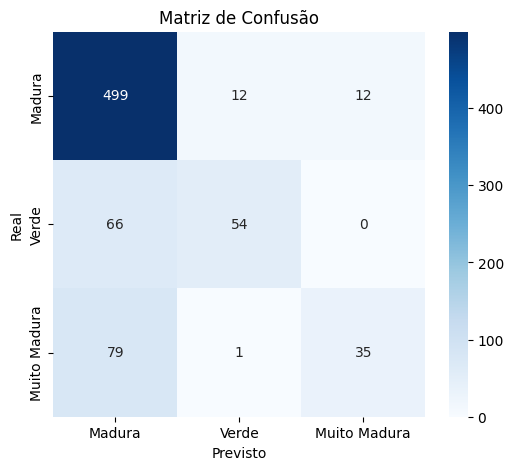

In [35]:
# Criar heatmap da matriz de confusão
plt.figure(figsize=(6, 5))
sns.heatmap(matriz_confusao, annot=True, fmt="d", cmap="Blues", xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

#### 🔎 **Principais Observações**:
- O modelo teve **ótima precisão** para a classe **Madura**, com **499 previsões corretas**.
- A classe **Verde** teve **66 erros**, sendo frequentemente confundida com **Madura**.
- A classe **Muito Madura** também teve dificuldades de previsão, com **79 amostras incorretamente classificadas como Madura**.

A análise da matriz de confusão nos ajuda a identificar possíveis melhorias no modelo, como **balanceamento de classes**, **ajustes nos hiperparâmetros** ou **uso de técnicas de feature engineering**.


# 6. Otimização do Modelo

## 6.1 Teste com Outros Modelos

Para avaliar alternativas ao modelo **Random Forest**, treinamos e testamos outros algoritmos de machine learning. O objetivo foi comparar o desempenho de cada modelo e identificar a melhor abordagem para a predição do nível de maturação das maçãs.

# 6. Otimização do Modelo

## 6.1 Teste com Outros Modelos

Para avaliar alternativas ao modelo **Random Forest**, treinamos e testamos outros algoritmos de machine learning. O objetivo foi comparar o desempenho de cada modelo e identificar a melhor abordagem para a predição do nível de maturação das maçãs.

In [36]:
# Criar e treinar diferentes modelos
modelos = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Regressão Logística": LogisticRegression(max_iter=1000, random_state=42)
}
resultados_modelos = {}

In [37]:
# Treinar e avaliar cada modelo
for nome, modelo in modelos.items():
    modelo.fit(X_train_scaled, y_train)
    y_pred_modelo = modelo.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred_modelo)
    resultados_modelos[nome] = acc

In [38]:
# Converter resultados em DataFrame para exibição
df_resultados_modelos = pd.DataFrame(list(resultados_modelos.items()), columns=["Modelo", "Acurácia"])
df_resultados_modelos

,Modelo,Acurácia
0,Random Forest,0.775726
1,SVM,0.810026
2,KNN,0.790237
3,Regressão Logística,0.721636


### 🔎 **Principais Observações**:
- O modelo **SVM** apresentou a melhor acurácia, atingindo **81.00%**, superando os demais modelos.
- O modelo **KNN** também teve um bom desempenho, com **79.02%** de acurácia.
- O **Random Forest**, modelo inicial, obteve **77.57%**, o que ainda é um bom resultado.
- A **Regressão Logística** teve o menor desempenho (**72.16%**), indicando que pode não ser a melhor escolha para este problema.

Dado o desempenho superior do **SVM**, podemos explorá-lo mais a fundo, ajustando seus hiperparâmetros para otimização.

# 7. Interpretação dos Resultados

## Avaliação da Importância das Variáveis para a Predição da Maturação

Para entender quais variáveis influenciam mais na previsão da **maturação das maçãs**, analisamos a importância de cada uma dentro do modelo **Random Foresecisão das previsões.


In [40]:
importancias = modelo_rf.feature_importances_

# Criar um DataFrame com as importâncias
df_importancias = pd.DataFrame({"Variável": X.columns, "Importância": importancias})

# Ordenar do mais importante para o menos importante
df_importancias = df_importancias.sort_values(by="Importância", ascending=False)
df_importancias

,Variável,Importância
2,doçura,0.202423
0,tamanho,0.190556
1,peso,0.163296
4,suculencia,0.149359
3,crocancia,0.147850
5,acidez,0.146516


### 🔎 **Principais Observações**:
- **Doçura** foi a variável mais importante na previsão da maturação, indicando que maçãs mais maduras tendem a ser mais doces.
- **Tamanho** e **Peso** também tiveram papéis significativos, sugerindo que maçãs maiores e mais pesadas podem estar associadas a um estágio mais avançado de maturação.
- **Suculência** e **Crocância** aparecem com importâncias similares, possivelmente influenciando na diferenciação entre maçãs maduras e verdes.


# 8. Conclusão

## 📌 **Insights Gerados a partir dos Dados**
Com base na análise exploratória, modelagem preditiva e avaliação do desempenho do modelo, foram extraídos alguns insights relevantes:

- O modelo **SVM (Support Vector Machine)** apresentou a melhor acurácia (**81.00%**), sendo o mais eficaz na predição da maturação das maçãs.
- As variáveis mais influentes na predição da maturação foram **doçura, tamanho e peso**, indicando que maçãs mais maduras tendem a ser mais doces, maiores e mais pesadas.
- A classe **"Madura"** foi a mais fácil de prever corretamente, enquanto **"Verde"** e **"Muito Madura"** apresentaram mais erros, sugerindo que a transição entre esses estágios pode ser mais sutil nos dados.

## 🔬 **Impacto da Acidez e Suculência na Maturação**
- **Acidez**: Embora não tenha sido uma das variáveis mais influentes, observamos que maçãs mais ácidas tendem a estar associadas a um estágio menos avançado de maturação. Isso faz sentido, pois frutas mais verdes geralmente possuem maior acidez.
- **Suculência**: A suculência apresentou um impacto maior do que a acidez na maturação. Maçãs mais maduras geralmente apresentam maior nível de suculência, pois a maturação aumenta a quantidade de líquidcola e alimentícia.
